<a href="https://colab.research.google.com/github/PranidhiM/Predicting-30-Day-Hospital-Readmissions-Using-Machine-Learning-on-Clinical-and-Demographic-Data/blob/main/Patient_Readmission_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('diabetic_data.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
df.isnull().sum().sort_values(ascending=False)
print(df.shape)
print(df.columns)
print(df.dtypes)

(101766, 50)
Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')
encounter_id                 int64
patient_nbr          

In [4]:
df['readmitted'].value_counts()

,count
readmitted,
NO,54864
>30,35545
<30,11357


In [5]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Fix the typo here
df['readmitted_binary'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)

# Encode categorical columns
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(df.drop(['readmitted', 'readmitted_binary'], axis=1))
y = df['readmitted_binary'].values  # Fix typo here as well


In [6]:
df.isnull()
df.isna()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmitted_binary
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101762,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101763,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
101764,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

In [8]:
#Building the model with the Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model =Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid') #Binary Output
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 27s 8ms/step - accuracy: 0.8774 - loss: 0.3878 - val_accuracy: 0.8921 - val_loss: 0.3331
Epoch 2/10
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8890 - loss: 0.3438 - val_accuracy: 0.8922 - val_loss: 0.3339
Epoch 3/10
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8858 - loss: 0.3473 - val_accuracy: 0.8922 - val_loss: 0.3306
Epoch 4/10
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8877 - loss: 0.3400 - val_accuracy: 0.8921 - val_loss: 0.3310
Epoch 5/10
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8877 - loss: 0.3369 - val_accuracy: 0.8922 - val_loss: 0.3312
Epoch 6/10
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8873 - loss: 0.3397 - val_accuracy: 0.8919 - val_loss: 0.3290
Epoch 7/10
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8888 - loss: 0.3348 - val_accuracy: 0.8921 - val_loss: 0.3294
Epoch 8/10
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8879 - loss: 0.3369 -

In [9]:
#training the model to fit
history = model.fit (X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8880 - loss: 0.3366 - val_accuracy: 0.8919 - val_loss: 0.3297
Epoch 2/10
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8867 - loss: 0.3370 - val_accuracy: 0.8919 - val_loss: 0.3295
Epoch 3/10
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8866 - loss: 0.3368 - val_accuracy: 0.8922 - val_loss: 0.3307
Epoch 4/10
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8876 - loss: 0.3352 - val_accuracy: 0.8919 - val_loss: 0.3298
Epoch 5/10
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8877 - loss: 0.3351 - val_accuracy: 0.8920 - val_loss: 0.3299
Epoch 6/10
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8903 - loss: 0.3298 - val_accuracy: 0.8921 - val_loss: 0.3297
Epoch 7/10
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8866 - loss: 0.3363 - val_accuracy: 0.8920 - val_loss: 0.3298
Epoch 8/10
2036/2036 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8891 - loss: 0.3315 

Text(0, 0.5, 'Loss')

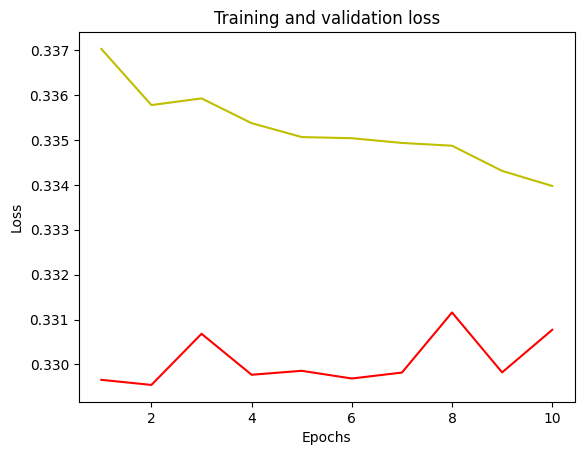

In [10]:
#loss or accuracy curves

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [11]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Only needed for deep learning models with sigmoid output

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


637/637 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     18069
           1       0.77      0.00      0.01      2285

    accuracy                           0.89     20354
   macro avg       0.83      0.50      0.47     20354
weighted avg       0.87      0.89      0.84     20354

[[18066     3]
 [ 2275    10]]


In [12]:
#droping or handlilng the irrelevant or sparse columns
df = df.drop(['encounter_id', 'patient_nbr'], axis=1)
df = df.drop(columns =df.columns[df.isnull().mean()>0.5])
# Here we are dropping the columns which is less than 50 per cent and are missing


In [13]:
#cleaning and encoding the categorical features
#we are converting object type columns into numerical using LabelEncoder or onehot encoder

categorical_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()

for col in categorical_cols:
  df[col]=df[col].astype(str) # ensure all sre strings
  df[col]=le.fit_transform(df[col]) #apply label encoder to each column

In [14]:
# Normalizing numerical features
x = df.drop(['readmitted', 'readmitted_binary'], axis=1)
y = df['readmitted_binary']

scaler = StandardScaler()
x = scaler.fit_transform(x)


In [15]:
#HANDLING CLASS IMBALANCES WITH SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

In [16]:
#training and testing the split

x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

In [17]:
model.save('patient_readmission_model.keras')

637/637 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Confusion Matrix:
[[20354]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20354

    accuracy                           1.00     20354
   macro avg       1.00      1.00      1.00     20354
weighted avg       1.00      1.00      1.00     20354

ROC AUC Score: nan


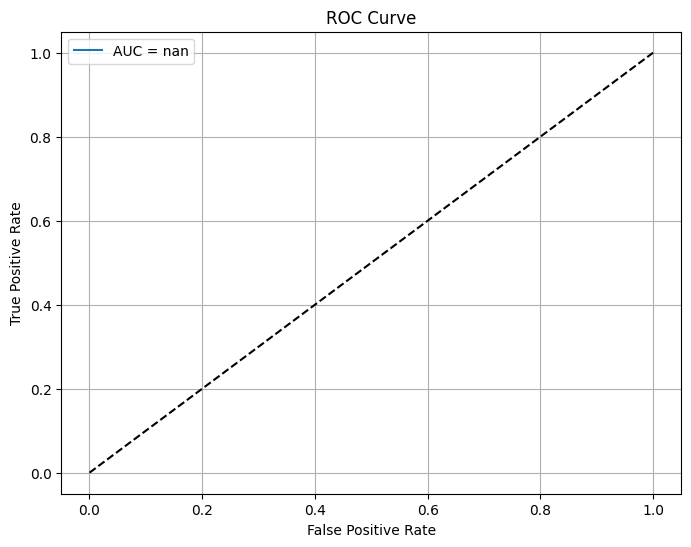

In [19]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve


# Step 1: Encode categorical features
df = df.copy()  # safety
df['readmitted_binary'] = df['readmitted'].apply(lambda x: 1 if x == '<30' else 0)

categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Step 2: Define features and target
X = df.drop(['readmitted', 'readmitted_binary'], axis=1)
y = df['readmitted_binary']

# Step 3: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 5: Define and train a model (if not already trained)
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1, verbose=0)

# Step 6: Evaluation
y_prob = model.predict(X_test).ravel()
y_pred = (y_prob > 0.5).astype(int)

# Confusion Matrix and Report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC AUC
auc_score = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", auc_score)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [20]:
#imputing the remaining values
df['race'].fillna(df['race'].mode()[0], inplace=True)  # mode for categorical


In [21]:
#feature engineering.
# combining the similar diagnosis codes by group ICD-9 codes
def combine_icd9_codes(df):
  try:
    df['diag_1'] = df['diag_1'].str.replace('E', '0')
    df['diag_1'] = df['diag_1'].str.replace('V', '0')
    df['diag_2'] = df['diag_2'].str.replace('E', '0')
    df['diag_2'] = df['diag_2'].str.replace('V', '0')
    df['diag_3'] = df['diag_3'].str.replace('E', '0')
    df['diag_3'] = df['diag_3'].str.replace('V', '0')
    return df
  except:
    return df

df = combine_icd9_codes(df)
#PRINT
print(df.head())

   race  gender  age  weight  admission_type_id  discharge_disposition_id  \
0     3       0    0       1                  6                        25   
1     3       0    1       1                  1                         1   
2     1       0    2       1                  1                         1   
3     3       1    3       1                  1                         1   
4     3       1    4       1                  1                         1   

   admission_source_id  time_in_hospital  payer_code  medical_specialty  ...  \
0                    1                 1           0                 38  ...   
1                    7                 3           0                  0  ...   
2                    7                 2           0                  0  ...   
3                    7                 2           0                  0  ...   
4                    7                 1           0                  0  ...   

   insulin  glyburide-metformin  glipizide-metformin  \


In [22]:
#Create is_senior feature
df['is_senior'] = df['age'].astype(str).str.contains('70|80|90').astype(int)


In [23]:
#counting thte medications or any past visits
df['med_count'] = (df[[col for col in df.columns if 'medications' in col]] != 0).sum(axis=1)
df['visit_count'] = df['number_inpatient'] + df['number_outpatient'] + df['number_emergency']
print(df.head())

   race  gender  age  weight  admission_type_id  discharge_disposition_id  \
0     3       0    0       1                  6                        25   
1     3       0    1       1                  1                         1   
2     1       0    2       1                  1                         1   
3     3       1    3       1                  1                         1   
4     3       1    4       1                  1                         1   

   admission_source_id  time_in_hospital  payer_code  medical_specialty  ...  \
0                    1                 1           0                 38  ...   
1                    7                 3           0                  0  ...   
2                    7                 2           0                  0  ...   
3                    7                 2           0                  0  ...   
4                    7                 1           0                  0  ...   

   glimepiride-pioglitazone  metformin-rosiglitazone  me

In [24]:
print(df['med_count'])

0         1
1         1
2         1
3         1
4         1
         ..
101761    1
101762    1
101763    1
101764    1
101765    1
Name: med_count, Length: 101766, dtype: int64


In [25]:
print(df['visit_count'])

0         0
1         0
2         3
3         0
4         0
         ..
101761    0
101762    1
101763    1
101764    1
101765    0
Name: visit_count, Length: 101766, dtype: int64


In [26]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('readmitted_binary')
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [27]:
#using minmaxscaler incase values must be between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
print(df[numeric_cols])

        race  gender       age    weight  admission_type_id  \
0        0.6     0.0  0.000000  0.111111           0.714286   
1        0.6     0.0  0.111111  0.111111           0.000000   
2        0.2     0.0  0.222222  0.111111           0.000000   
3        0.6     0.5  0.333333  0.111111           0.000000   
4        0.6     0.5  0.444444  0.111111           0.000000   
...      ...     ...       ...       ...                ...   
101761   0.2     0.5  0.777778  0.111111           0.000000   
101762   0.2     0.0  0.888889  0.111111           0.000000   
101763   0.6     0.5  0.777778  0.111111           0.000000   
101764   0.6     0.0  0.888889  0.111111           0.142857   
101765   0.6     0.5  0.777778  0.111111           0.000000   

        discharge_disposition_id  admission_source_id  time_in_hospital  \
0                       0.888889             0.000000          0.000000   
1                       0.000000             0.250000          0.153846   
2                 

In [28]:
#evaluating in our modelling phases, such as Keras or Random Forest, after predictions
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Make predictions
y_prob = model.predict(X_test).ravel()  # raw probabilities
y_pred = (y_prob > 0.5).astype(int)     # convert to binary class

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
roc_auc = roc_auc_score(y_test, y_prob)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")


637/637 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 1.0000
Precision: 0.0000
Recall: 0.0000
ROC AUC: nan


In [29]:
#Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

estimator = RandomForestClassifier()
selector = RFE(estimator, n_features_to_select=15)
X_train_rfe = selector.fit_transform(X_train, y_train)
X_test_rfe = selector.transform(X_test)


In [30]:
selected_columns = X.columns[selector.support_]
print("Selected features:", selected_columns.tolist())


Selected features: ['rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed']


In [31]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

importances = model.feature_importances_
feature_ranking = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print(feature_ranking.head(10))


race                        0.0
gender                      0.0
age                         0.0
weight                      0.0
admission_type_id           0.0
discharge_disposition_id    0.0
admission_source_id         0.0
time_in_hospital            0.0
payer_code                  0.0
medical_specialty           0.0
dtype: float64


In [32]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train_rfe, y_train)

print("Best parameters:", grid.best_params_)


Best parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}


In [33]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 15),
    'min_samples_split': randint(2, 10)
}

random_search = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_dist, n_iter=10, cv=5, scoring='roc_auc')
random_search.fit(X_train_rfe, y_train)

print("Best parameters:", random_search.best_params_)


Best parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 110}


In [34]:
best_model = random_search.best_estimator_
best_model.fit(X_train_rfe, y_train)


RandomForestClassifier(max_depth=5, n_estimators=110)

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Check class distribution in training data
print("Class distribution in y_train:")
print(pd.Series(y_train).value_counts())

# Predict class labels
y_pred = best_model.predict(X_test_rfe)

# Handle class probability prediction safely
if hasattr(best_model, "predict_proba"):
    # Check if class 1 exists
    classes = list(best_model.classes_)
    print("Model classes:", classes)

    if 1 in classes:
        class_index = classes.index(1)
        y_proba = best_model.predict_proba(X_test_rfe)[:, class_index]
        roc_auc = roc_auc_score(y_test, y_proba)
    else:
        print("Warning: Class 1 not found in model.classes_ — setting y_proba to zeros")
        y_proba = [0] * len(y_test)
        roc_auc = float('nan')
else:
    y_proba = [0] * len(y_test)
    roc_auc = float('nan')

# Evaluate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)

# Print results
print(f"\nEvaluation Metrics:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"ROC AUC:   {roc_auc:.4f}")


Class distribution in y_train:
readmitted_binary
0    81412
Name: count, dtype: int64
Model classes: [np.int64(0)]

Evaluation Metrics:
Accuracy:  1.0000
Precision: 0.0000
Recall:    0.0000
ROC AUC:   nan
